In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [30]:
images = []
ages = []
genders = []

for i in os.listdir("D:/Projects/Age_and_Gender/utkface_aligned_cropped/crop_part1/")[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open("D:/Projects/Age_and_Gender/utkface_aligned_cropped/crop_part1/" + i))

In [31]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1


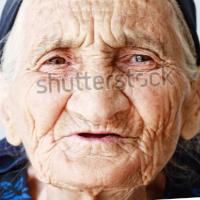

100 1


In [32]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

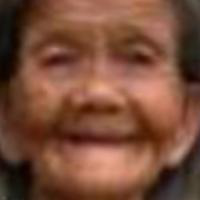

100 1


In [33]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

C:\Users\Mohammed Qadir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

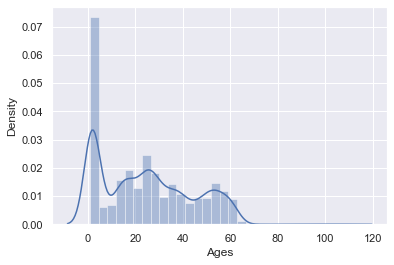

In [34]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [35]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

C:\Users\Mohammed Qadir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

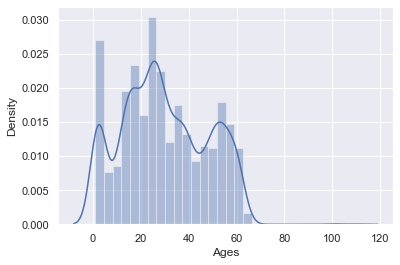

In [36]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [37]:
df = df[df['Ages'] < 80]

C:\Users\Mohammed Qadir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

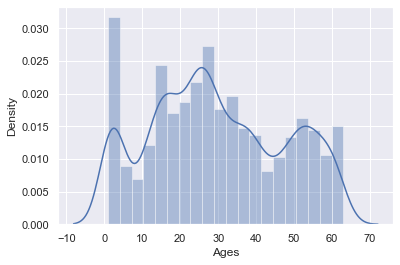

In [38]:
sns.distplot(df['Ages'],kde=True, bins=20)

C:\Users\Mohammed Qadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

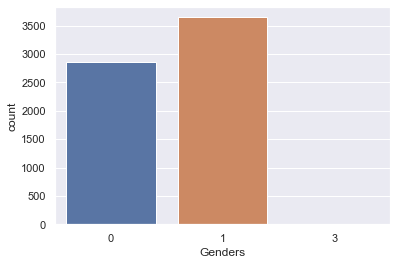

In [39]:
sns.countplot(df['Genders'])

C:\Users\Mohammed Qadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genders', ylabel='count'>

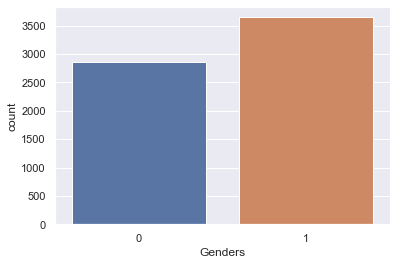

In [40]:
df = df[df['Genders'] != 3]
sns.countplot(df['Genders'])

In [41]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\Mohammed Qadir\AppData\Local\Temp\ipykernel_17468\2993096863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [42]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [17]:
# print(y_age.value_counts())
# print(y_gender.value_counts())


1      326
26     279
16     212
24     191
18     181
      ... 
63      39
44      27
110      2
100      2
101      1
Name: Ages, Length: 62, dtype: int64
1    3644
0    2863
Name: Genders, dtype: int64


In [22]:
# # Count the number of instances per age class
# age_counts = df_filtered['Ages'].value_counts()

# # Get the classes with at least two instances
# valid_classes = age_counts[age_counts >= 2].index

# # Filter the dataset based on valid age classes
# df_filtered = df_filtered[df_filtered['Ages'].isin(valid_classes)]

# # Separate features and target variables
# x = np.array(df_filtered['Images'])
# y_age = np.array(df_filtered['Ages'])
# y_gender = np.array(df_filtered['Genders'])

# # Perform train-test split
# x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
# x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)


array([<PIL.Image.Image image mode=RGB size=200x200 at 0x219B2B9F040>,
       <PIL.Image.Image image mode=RGB size=200x200 at 0x219B2C37AF0>,
       <PIL.Image.Image image mode=RGB size=200x200 at 0x219B2FF55B0>,
       ...,
       <PIL.Image.Image image mode=RGB size=200x200 at 0x219B2BA1DC0>,
       <PIL.Image.Image image mode=RGB size=200x200 at 0x219B2B9B160>,
       <PIL.Image.Image image mode=RGB size=200x200 at 0x219B2BE18E0>],
      dtype=object)

In [43]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(learning_rate=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [44]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
163/163 [==============================] - 183s 1s/step - loss: 437.1401 - val_loss: 323.4227
Epoch 2/50
163/163 [==============================] - 180s 1s/step - loss: 352.4128 - val_loss: 286.0833
Epoch 3/50
163/163 [==============================] - 181s 1s/step - loss: 311.1625 - val_loss: 264.9756
Epoch 4/50
163/163 [==============================] - 182s 1s/step - loss: 278.6422 - val_loss: 213.2714
Epoch 5/50
163/163 [==============================] - 179s 1s/step - loss: 261.0706 - val_loss: 197.2504
Epoch 6/50
163/163 [==============================] - 181s 1s/step - loss: 254.1073 - val_loss: 193.6957
Epoch 7/50
163/163 [==============================] - 179s 1s/step - loss: 243.7829 - val_loss: 192.7443
Epoch 8/50
163/163 [==============================] - 215s 1s/step - loss: 238.8427 - val_loss: 194.2510
Epoch 9/50
163/163 [==============================] - 243s 1s/step - loss: 234.6763 - val_loss: 184.1904
Epoch 10/50
163/163 [==============================] - 

In [50]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
82/82 [==============================] - 281s 3s/step - loss: 0.3729 - accuracy: 0.8318 - val_loss: 0.3348 - val_accuracy: 0.8463
Epoch 2/50
82/82 [==============================] - 266s 3s/step - loss: 0.3787 - accuracy: 0.8331 - val_loss: 0.3357 - val_accuracy: 0.8394
Epoch 3/50
82/82 [==============================] - 243s 3s/step - loss: 0.3753 - accuracy: 0.8329 - val_loss: 0.3279 - val_accuracy: 0.8417
Epoch 4/50
82/82 [==============================] - 265s 3s/step - loss: 0.3686 - accuracy: 0.8354 - val_loss: 0.3269 - val_accuracy: 0.8386
Epoch 5/50
82/82 [==============================] - 274s 3s/step - loss: 0.3631 - accuracy: 0.8387 - val_loss: 0.3160 - val_accuracy: 0.8424
Epoch 6/50
82/82 [==============================] - 343s 4s/step - loss: 0.3653 - accuracy: 0.8379 - val_loss: 0.3174 - val_accuracy: 0.8440
Epoch 7/50
82/82 [==============================] - 271s 3s/step - loss: 0.3570 - accuracy: 0.8383 - val_loss: 0.3095 - val_accuracy: 0.8470
Epoch 8/50
82

In [46]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

1/1 [==============================] - 0s 38ms/step
Age: 34 
 Gender: male


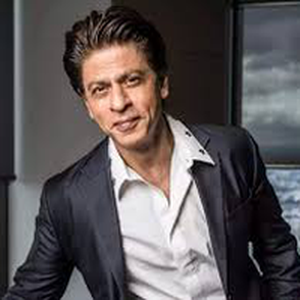

In [60]:
process_and_predict("C:/Users/Mohammed Qadir/Downloads/images.jpeg")

1/1 [==============================] - 0s 40ms/step
Age: 25 
 Gender: male


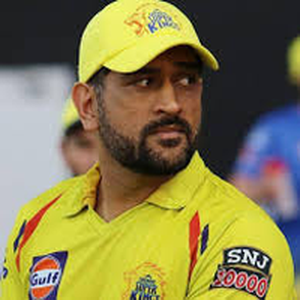

In [88]:
process_and_predict("C:/Users/Mohammed Qadir/Downloads/Dhoni.jpeg")

In [104]:
# process_and_predict("C:/Users/Mohammed Qadir/Pictures/Camera Roll/WIN_20210125_10_36_52_Pro.jpg")

In [121]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/pkn.jpg")

In [105]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/kush.jpg")

In [120]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/gau.jpg")

In [106]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/qad.jpg")

In [107]:
# process_and_predict("C:/Users/Mohammed Qadir/Pictures/Screenshots/tabu.jpg")

In [108]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/chan.jpg")

In [119]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/qad2.jpg")

In [109]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/faiz.jpg")

In [110]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/qad3.jpg")

In [118]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/pops2.jpg")

1/1 [==============================] - 0s 146ms/step
Age: 42 
 Gender: male


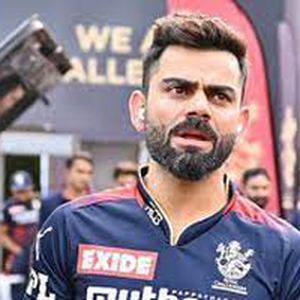

In [111]:
process_and_predict("C:/Users/Mohammed Qadir/Downloads/virat.jpeg")

In [112]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/balu.jpg")

In [113]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/jas1.jpg")

In [114]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/roc.jpg")

In [115]:
# process_and_predict("C:/Users/Mohammed Qadir/Downloads/pra.jpg")

1/1 [==============================] - 0s 36ms/step
Age: 57 
 Gender: female


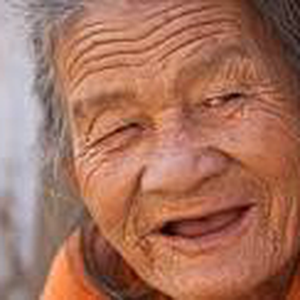

In [103]:
process_and_predict("C:/Users/Mohammed Qadir/Downloads/oldwoman.jpeg")

1/1 [==============================] - 0s 51ms/step
Age: 4 
 Gender: male


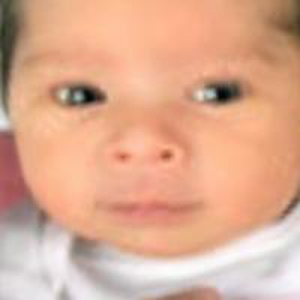

In [117]:
process_and_predict("D:/Projects/Age_and_Gender/crop_part1/1_0_0_20161219160713534.jpg.chip.jpg")

In [79]:
agemodel.save("D:/Projects/Age_and_Gender/age_model.h5")

In [80]:
genmodel.save("D:/Projects/Age_and_Gender/gen_model.h5")